### Collecting data on the web using Beautiful Soup

##### This notebook was made during my journey in IGTI bootcamp and aims to collect data from a HTML web page to be used in a further analysis


#### Installing the libraries

In [1]:
!pip install beautifulsoup4 #necessary step to install the new library to use beautiful soup

In [2]:
#Step 1 - Importing necessary libraries

import requests                             #library to run HTMLs requests
from bs4 import BeautifulSoup               #main library to the module
import re                                   #library to run regular expression

#### Collecting the data

For this demonstration, it was used a newspaper web page with the mayor candidates of 2020's ellection. Only basic data will be extracted like name, party, etc. In a first sight, I will extract the raw data in HTML format and after that, I will use the Beautiful Soup library to *beautify* these data in a more structured way

In [38]:
#Step 2 - Starting a request from the desired link

r = requests.get("https://politica.estadao.com.br/eleicoes/2020/candidatos") #defining "r" as a variable of atributes
r.text #return text from web page

'<!DOCTYPE html><html lang="pt-BR"><head><script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\': new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0], j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src= \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f); })(window,document,\'script\',\'dataLayerEstadao\',\'GTM-M4LH38R\');</script><meta charset="UTF-8"/><script async=\'async\' src=\'https://www.googletagservices.com/tag/js/gpt.js\'></script><script async=\'async\' src="https://statics.estadao.com.br/s2016/utils/publicidade/dfp.min.js"></script> <script type=\'text/javascript\'> var DFP = DFP || {}; DFP.cmd = DFP.cmd || []; DFP.cmd.push(function(){DFP.Prebid.init({ "bids": [{ "accepted_formats": [{ "devices": ["xl", "lg", "md", "sm", "xs"], "format": [300, 250], "params": { "networkId": 5963 } }, { "devices": ["xl", "lg", "md"], "format": [970, 90], "params": { "networkId": 5963 } }, { "devices": 

As mentioned before, the data came structured but the visual should be improved. To do that, we should go to the HTML page itself and inspect the elements contained in this page. I used Google Chrome's Dev Tools to map de DIV and CLASS that should be part of my REGEX.

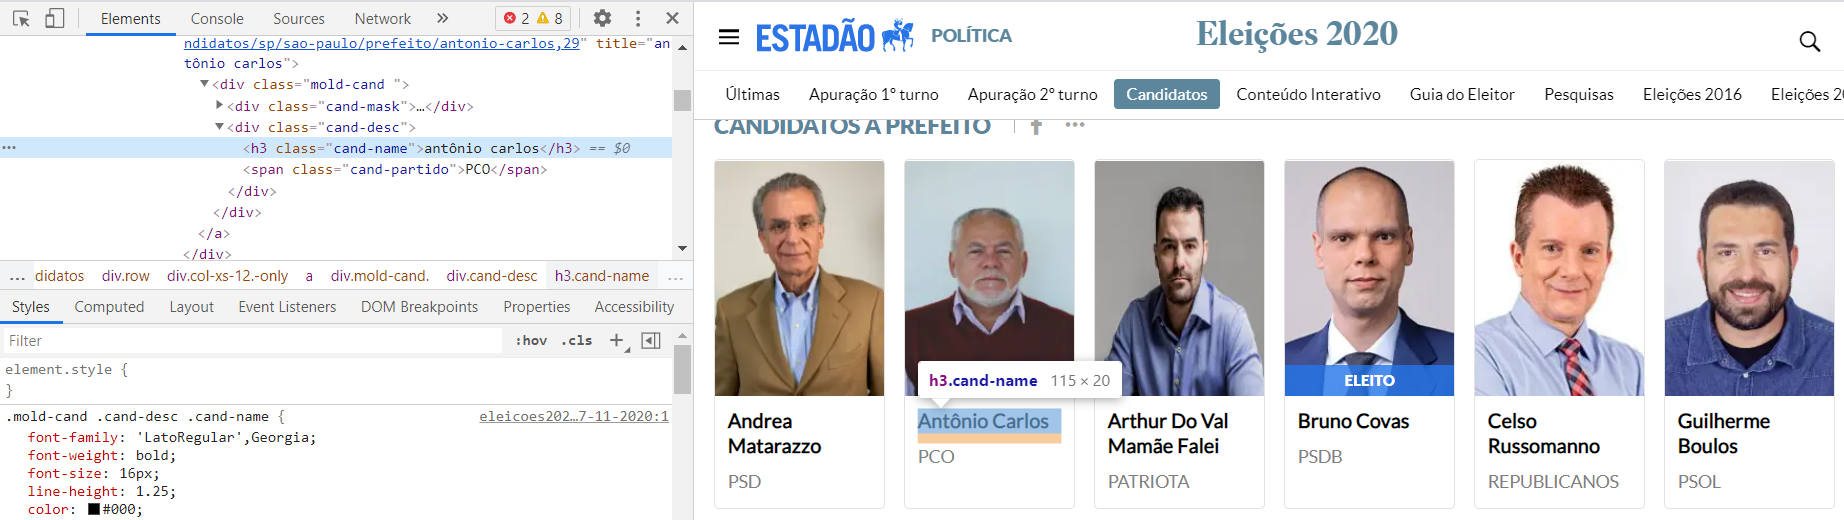



In [39]:
#Step 3 - Create the Soup object, avoiding unnecessary HTML parameter

soup = BeautifulSoup(r.text, 'html.parser')
type(soup) #confirmation if the type of created object is soup

bs4.BeautifulSoup

Since I know the data I need and I mapped it in the HTML document, it is possible to moving forward with other extractions:

In [49]:
#Step 4 - Return all <divs> which match with my classes
candidates = soup.find_all("div", attrs={"class": "col-xs-12 -only"})
#type(candidates)
candidates[3]

<div class="col-xs-12 -only"> <a href="https://politica.estadao.com.br/eleicoes/2020/candidatos/sp/sao-paulo/prefeito/bruno-covas,45" title="bruno covas"> <div class="mold-cand -type-eleito"> <div class="cand-mask"> <img alt="bruno covas" class="elazy" data-src="https://img.estadao.com.br/fotos/politica/eleicoes-2020/SP/FSP250000896546_div.jpg" onerror="this.onerror=null;this.src='https://statics.estadao.com.br/s2016/portal/eleicoes2020/img/img_placeholder.png';"/> </div> <div class="cand-desc"> <h3 class="cand-name">bruno covas</h3> <span class="cand-partido">PSDB</span> </div> </div> </a> </div>

In [57]:
#Step 5 - Collecting each candidate name using TAG "img"
candidate_name = candidates[1].img["alt"] #return the first element of the list
candidate_name2 = candidates[1].a["title"]
print('Extração do nome do candidato utilizando a TAG "img": ', candidate_name)
print('Extração do nome do candidato utilizando a TAG "a": ', candidate_name2)

Extração do nome do candidato utilizando a TAG "img":  antônio carlos
Extração do nome do candidato utilizando a TAG "a":  antônio carlos


In [55]:
#Step 6 - Collecting the party of each candidate
party = candidates[1].span.text
print(party)

PCO


In [56]:
#Step 7 - Collect additional information to the list

import re

print(candidates[1].a["href"]) #current link has relevant information as state and city
print(re.split('/',candidates[1].a["href"]))
print("Estado do candidato: ", re.split('/',candidates[1].a["href"])[6])
print("Cidade do candidato: ", re.split('/',candidates[1].a["href"])[7])

https://politica.estadao.com.br/eleicoes/2020/candidatos/sp/sao-paulo/prefeito/antonio-carlos,29
['https:', '', 'politica.estadao.com.br', 'eleicoes', '2020', 'candidatos', 'sp', 'sao-paulo', 'prefeito', 'antonio-carlos,29']
Estado do candidato:  sp
Cidade do candidato:  sao-paulo


In [59]:
#Step 8 - Merge all solutions to develop a list

list = []
for candidate in candidates:
        c_data = []
        c_data.append(candidate.img["alt"]) #name
        c_data.append(candidate.span.text) #party
        c_data.append(re.split('/',candidate.a["href"])[6])
        c_data.append(re.split('/',candidate.a["href"])[7])
        c_data.append(candidate.a["href"])
        list.append(c_data)
        
list[:2]

[['andrea matarazzo',
  'PSD',
  'sp',
  'sao-paulo',
  'https://politica.estadao.com.br/eleicoes/2020/candidatos/sp/sao-paulo/prefeito/andrea-matarazzo,55'],
 ['antônio carlos',
  'PCO',
  'sp',
  'sao-paulo',
  'https://politica.estadao.com.br/eleicoes/2020/candidatos/sp/sao-paulo/prefeito/antonio-carlos,29']]

###### Creating Dataframe 

Since I already have my data collected, I can now import Pandas library and then create a dataframe with that. It is recomendable to do some exploratory analysis to make sure the data is reliable. After that, I will process the dataframe in order to make it more organized to be ready for further analysis.

In [70]:
import pandas as pd
df_cand = pd.DataFrame(list, columns=['name','party','state','city','link'])
df_cand[:4]

,name,party,state,city,link
0,andrea matarazzo,PSD,sp,sao-paulo,https://politica.estadao.com.br/eleicoes/2020/...
1,antônio carlos,PCO,sp,sao-paulo,https://politica.estadao.com.br/eleicoes/2020/...
2,arthur do val mamãe falei,PATRIOTA,sp,sao-paulo,https://politica.estadao.com.br/eleicoes/2020/...
3,bruno covas,PSDB,sp,sao-paulo,https://politica.estadao.com.br/eleicoes/2020/...


In [73]:
#df_cand['city'].value_counts()
#df_cand['party'].value_counts()
df_cand['city'] = df_cand.city.str.replace('-',' ').str.upper()
df_cand['state'] = df_cand.state.str.upper()
df_cand['name'] = df_cand.name.str.upper()
df_cand

,name,party,state,city,link
0,ANDREA MATARAZZO,PSD,SP,SAO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
1,ANTÔNIO CARLOS,PCO,SP,SAO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
2,ARTHUR DO VAL MAMÃE FALEI,PATRIOTA,SP,SAO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
3,BRUNO COVAS,PSDB,SP,SAO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
4,CELSO RUSSOMANNO,REPUBLICANOS,SP,SAO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
5,GUILHERME BOULOS,PSOL,SP,SAO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
6,JILMAR TATTO,PT,SP,SAO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
7,JOICE HASSELMANN,PSL,SP,SAO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
8,LEVY FIDELIX,PRTB,SP,SAO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
9,MARINA HELOU,REDE,SP,SAO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
